# Data Cleaning 

In [352]:
import pandas as pd
from data_cleaning import df_cleaned

# Example: read in some CSV
all_school = pd.read_csv("csv/all_schools.csv")
all_school = df_cleaned(all_school)
all_school.head()

,Rk,School,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,NCAA
0,1,Abilene Christian,32,16,16,0.500,-5.47,-2.02,8,8,...,666,0.715,355,1081,421,331,94,476,670,0
1,2,Air Force,32,4,28,0.125,-7.75,3.96,1,19,...,572,0.635,236,956,428,181,91,433,571,0
2,3,Akron,34,28,6,0.824,3.54,-4.52,17,1,...,570,0.753,410,1325,615,262,127,407,609,1
3,4,Alabama,33,25,8,0.758,25.96,16.26,13,5,...,853,0.716,426,1422,555,200,147,422,628,1
4,5,Alabama A&M,32,10,22,0.313,-20.36,-9.77,6,12,...,738,0.664,447,1172,432,266,131,513,687,0


In [353]:
import pandas as pd
from difflib import get_close_matches

# Read and clean the all_schools DataFrame
all_school = pd.read_csv("csv/all_schools.csv")
all_school = df_cleaned(all_school)
all_school['School'] = [i.strip() for i in all_school['School']]
# Drop unwanted columns
all_school = all_school.drop(columns=['Conf. W','Conf. L', 'Home W', 'Home L', 'Away W', 'Away L', 'Rk'])

# Read in new_data CSV and clean the 'School' column
df = pd.read_csv('csv/new_data.csv').fillna(0)
df['School'] = [i.strip() for i in df['School']]

# Get unique school names from both datasets
df_schools = set(df['School'].unique())
all_schools = set(all_school['School'].unique())

# Find school names in df that are missing in all_school
missing_in_all = df_schools.difference(all_schools)
print("Schools in new_data missing in all_school:", missing_in_all)

# Optional: use difflib to find close matches and create a correction mapping
def correct_name(name, valid_names, cutoff=0.8):
    matches = get_close_matches(name, valid_names, n=1, cutoff=cutoff)
    return matches[0] if matches else name

# Build a mapping from misspelled name to the correct name (if a close match is found)
corrections = {}
for name in missing_in_all:
    corrected = correct_name(name, list(all_schools))
    if corrected != name:
        corrections[name] = corrected

print("Correction mapping:", corrections)

# Apply corrections to the df 'School' column
df['School'] = df['School'].replace(corrections)


# Now merge the dataframes using the corrected school names
df = df.merge(all_school, on="School")
df['GAMES'] = df['W_x'] + df['L_x']

# Optionally, drop unwanted columns after merging if needed
df = df.drop(columns=['W_x', 'L_x', 'SOS_x', 'SRS_x', 'G', 'W_y', 'L_y', 
                      'Opp.', 'Tm.', 'Opp.', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'SRS_y', 'SOS_y'])

# Display the columns to check the result
print(df.columns)


Schools in new_data missing in all_school: set()
Correction mapping: {}
Index(['Rk', 'School', 'Conf', 'AP Rank ', 'Pts', 'Opp', 'MOV', 'OSRS', 'DSRS',
       'ORtg', 'DRtg', 'NRtg', 'Seed', 'W-L%', 'MP', 'FG%', '3P%', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'NCAA', 'GAMES'],
      dtype='object')


In [354]:
df[df['NCAA'] == 1]

,Rk,School,Conf,AP Rank,Pts,Opp,MOV,OSRS,DSRS,ORtg,...,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,NCAA,GAMES
0,1,Duke,ACC,1.0,82.7,61.9,20.79,14.04,16.31,130.22,...,0.784,381,1313,570,236,129,326,541,1,34
1,2,Auburn,SEC,4.0,83.8,69.6,14.24,17.96,11.67,130.73,...,0.740,385,1223,544,230,204,305,614,1,33
2,3,Houston,Big 12,2.0,74.2,58.5,15.74,7.45,21.00,125.49,...,0.741,417,1231,407,270,157,316,557,1,34
3,4,Florida,SEC,3.0,85.4,69.2,16.18,17.80,10.22,128.16,...,0.718,470,1429,539,263,159,362,586,1,34
4,5,Alabama,SEC,7.0,91.1,81.4,9.70,24.73,1.32,127.93,...,0.716,426,1422,555,200,147,422,628,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,SIU Edwardsville,OVC,0.0,72.6,66.1,6.48,-6.54,0.72,99.03,...,0.676,396,1270,451,222,131,375,544,1,33
250,251,American,Patriot,0.0,68.6,67.3,1.38,-7.86,0.83,101.00,...,0.756,262,1031,426,225,63,376,607,1,34
263,264,Mount St. Mary's,MAAC,0.0,70.4,69.8,0.56,-5.59,-2.24,97.46,...,0.734,351,1281,510,209,95,515,537,1,34
282,283,Alabama State,SWAC,0.0,73.3,72.1,1.23,-4.73,-4.54,98.85,...,0.692,397,1232,400,266,97,311,620,1,35


In [355]:
df

,Rk,School,Conf,AP Rank,Pts,Opp,MOV,OSRS,DSRS,ORtg,...,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,NCAA,GAMES
0,1,Duke,ACC,1.0,82.7,61.9,20.79,14.04,16.31,130.22,...,0.784,381,1313,570,236,129,326,541,1,34
1,2,Auburn,SEC,4.0,83.8,69.6,14.24,17.96,11.67,130.73,...,0.740,385,1223,544,230,204,305,614,1,33
2,3,Houston,Big 12,2.0,74.2,58.5,15.74,7.45,21.00,125.49,...,0.741,417,1231,407,270,157,316,557,1,34
3,4,Florida,SEC,3.0,85.4,69.2,16.18,17.80,10.22,128.16,...,0.718,470,1429,539,263,159,362,586,1,34
4,5,Alabama,SEC,7.0,91.1,81.4,9.70,24.73,1.32,127.93,...,0.716,426,1422,555,200,147,422,628,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,Maryland-Eastern Shore,MEAC,0.0,67.4,77.7,-10.32,-12.47,-8.00,91.53,...,0.664,307,1021,361,165,62,416,557,0,31
360,361,Chicago State,NEC,0.0,62.5,78.7,-16.16,-11.94,-8.92,87.63,...,0.705,273,981,344,235,114,412,607,0,32
361,362,Coppin State,MEAC,0.0,62.2,76.4,-14.17,-14.56,-6.44,84.76,...,0.681,290,919,336,244,57,447,520,0,30
362,363,Arkansas-Pine Bluff,SWAC,0.0,72.3,83.9,-11.61,-6.38,-17.74,92.37,...,0.593,306,1053,452,220,66,449,588,0,31


In [356]:
df.shape

(364, 27)

# EDA

In [357]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Basic dataset info
print("DataFrame Shape:", df.shape)
print("\nDataFrame Info:")
print(df.info())





DataFrame Shape: (364, 27)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        364 non-null    int64  
 1   School    364 non-null    object 
 2   Conf      364 non-null    object 
 3   AP Rank   364 non-null    float64
 4   Pts       364 non-null    float64
 5   Opp       364 non-null    float64
 6   MOV       364 non-null    float64
 7   OSRS      364 non-null    float64
 8   DSRS      364 non-null    float64
 9   ORtg      364 non-null    float64
 10  DRtg      364 non-null    float64
 11  NRtg      364 non-null    float64
 12  Seed      364 non-null    float64
 13  W-L%      364 non-null    float64
 14  MP        364 non-null    int64  
 15  FG%       364 non-null    float64
 16  3P%       364 non-null    float64
 17  FT%       364 non-null    float64
 18  ORB       364 non-null    int64  
 19  TRB       364 non-null    i

In [358]:
# 3. Look at the first few rows
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,Rk,School,Conf,AP Rank,Pts,Opp,MOV,OSRS,DSRS,ORtg,...,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,NCAA,GAMES
0,1,Duke,ACC,1.0,82.7,61.9,20.79,14.04,16.31,130.22,...,0.784,381,1313,570,236,129,326,541,1,34
1,2,Auburn,SEC,4.0,83.8,69.6,14.24,17.96,11.67,130.73,...,0.740,385,1223,544,230,204,305,614,1,33
2,3,Houston,Big 12,2.0,74.2,58.5,15.74,7.45,21.00,125.49,...,0.741,417,1231,407,270,157,316,557,1,34
3,4,Florida,SEC,3.0,85.4,69.2,16.18,17.80,10.22,128.16,...,0.718,470,1429,539,263,159,362,586,1,34
4,5,Alabama,SEC,7.0,91.1,81.4,9.70,24.73,1.32,127.93,...,0.716,426,1422,555,200,147,422,628,1,33


In [359]:
# 4. Descriptive statistics for numeric columns
print("\nDescriptive Statistics (numeric columns):")
df.describe()


Descriptive Statistics (numeric columns):


,Rk,AP Rank,Pts,Opp,MOV,OSRS,DSRS,ORtg,DRtg,NRtg,...,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,NCAA,GAMES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,182.500000,0.892857,73.809066,72.117308,1.690852,-0.224643,-0.183214,105.971291,106.530797,-0.559286,...,0.720014,341.739011,1143.368132,443.881868,222.159341,109.475275,383.565934,545.664835,0.186813,32.494505
std,105.221988,3.797499,5.063922,4.605357,6.268902,6.989582,6.367931,8.937301,8.125636,15.939565,...,0.037240,59.572310,102.754765,64.552239,41.684792,30.399579,45.950849,55.500009,0.390298,1.299490
min,1.000000,0.000000,54.100000,58.400000,-26.710000,-22.520000,-17.740000,77.620000,82.560000,-50.640000,...,0.593000,180.000000,802.000000,258.000000,105.000000,47.000000,289.000000,360.000000,0.000000,27.000000
25%,91.750000,0.000000,70.300000,69.200000,-1.947500,-5.380000,-4.952500,99.140000,101.642500,-12.150000,...,0.694000,299.750000,1078.750000,398.000000,193.000000,89.000000,351.000000,514.000000,0.000000,32.000000
50%,182.500000,0.000000,73.800000,71.950000,1.755000,-0.715000,-0.620000,105.275000,107.430000,-3.005000,...,0.722000,340.500000,1142.000000,439.000000,221.000000,106.000000,380.000000,548.000000,0.000000,33.000000
75%,273.250000,0.000000,77.200000,75.000000,5.902500,4.357500,4.055000,111.470000,112.120000,9.767500,...,0.746000,381.000000,1214.000000,488.500000,247.250000,127.000000,412.250000,582.250000,0.000000,33.000000
max,364.000000,25.000000,91.100000,84.800000,20.790000,24.730000,21.000000,130.730000,128.250000,44.310000,...,0.828000,518.000000,1429.000000,649.000000,338.000000,210.000000,562.000000,718.000000,1.000000,36.000000


In [360]:
# 5. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Rk          0
School      0
Conf        0
AP Rank     0
Pts         0
Opp         0
MOV         0
OSRS        0
DSRS        0
ORtg        0
DRtg        0
NRtg        0
Seed        0
W-L%        0
MP          0
FG%         0
3P%         0
FT%         0
ORB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
NCAA        0
GAMES       0
dtype: int64


In [361]:
# 6. Check for duplicates (optional, depends on your data expectations)
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


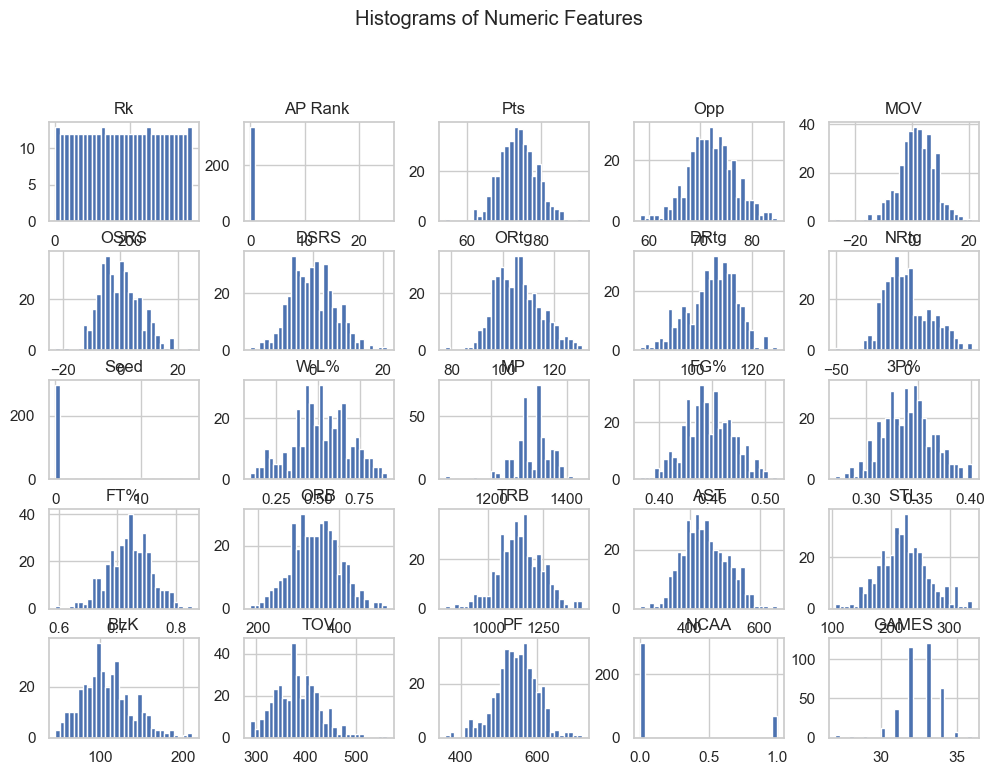

In [362]:
# 8. Visualize distributions of numeric features
#    (Replace with relevant numeric columns from your dataset)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features", y=1.02)
plt.show()

In [363]:
# 9. Correlation matrix
corr = df.corr(numeric_only=True)  # numeric_only=True in newer pandas versions
print("\nCorrelation Matrix:")
print(corr)


Correlation Matrix:
                Rk  AP Rank        Pts       Opp       MOV      OSRS  \
Rk        1.000000 -0.365028 -0.541872  0.395673 -0.728373 -0.826448   
AP Rank  -0.365028  1.000000  0.292004 -0.109369  0.315886  0.411535   
Pts      -0.541872  0.292004  1.000000  0.161531  0.689051  0.834644   
Opp       0.395673 -0.109369  0.161531  1.000000 -0.603865  0.066092   
MOV      -0.728373  0.315886  0.689051 -0.603865  1.000000  0.625764   
OSRS     -0.826448  0.411535  0.834644  0.066092  0.625764  1.000000   
DSRS     -0.796472  0.335556  0.058950 -0.773419  0.615576  0.398186   
ORtg     -0.916780  0.427964  0.690244 -0.214166  0.714922  0.918835   
DRtg      0.896985 -0.403742 -0.331829  0.559631 -0.679062 -0.656626   
NRtg     -0.971321  0.445774  0.556196 -0.405400  0.747063  0.849937   
Seed     -0.327593  0.177094  0.293376 -0.250641  0.420656  0.294020   
W-L%     -0.719060  0.307515  0.616567 -0.580738  0.924570  0.586444   
MP       -0.344152  0.150675  0.291924 -0.1

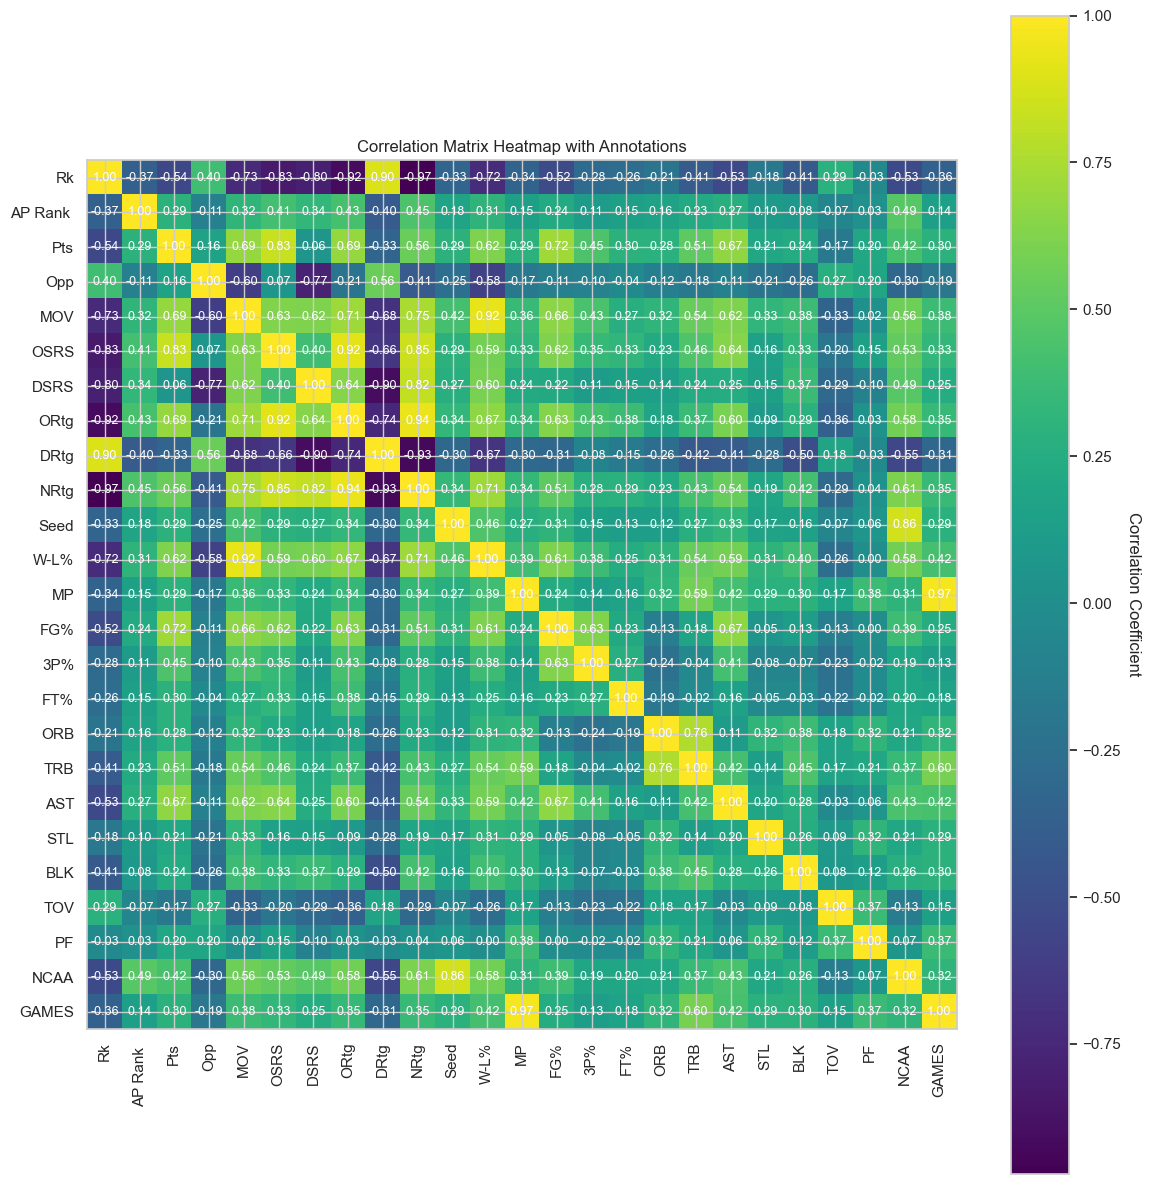

In [364]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose 'df' is your DataFrame and you have computed the correlation matrix:
corr = df.corr(numeric_only=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Display the correlation matrix as an image
im = ax.imshow(corr, cmap="viridis")  # or use another colormap

# We can add a colorbar
cbar = plt.colorbar(im)
cbar.ax.set_ylabel("Correlation Coefficient", rotation=-90, va="bottom")

# Show all ticks (one per column/index)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))

# Label them with the respective column names
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.index)

# Annotate each cell with the numeric value of the correlation
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        text = ax.text(
            j, i,
            f"{corr.iloc[i, j]:.2f}",  # format to 2 decimal places
            ha="center", va="center", color="white", fontsize=9
        )

# Set a title
plt.title("Correlation Matrix Heatmap with Annotations")

# Tight layout to prevent clipping
plt.tight_layout()
plt.show()


In a correlation matrix, values range from -1 to +1:
- +1 indicates a perfect positive linear relationship (as one feature increases, the other increases in lockstep).
- -1 indicates a perfect negative linear relationship (as one feature goes up, the other goes down in lockstep).
- 0 (or near 0) means there is no strong linear relationship between the two features.

Identify pairs with strong correlations.

- Strong positive correlation (e.g., above +0.7) might mean those two variables are measuring something very similar. You might not need both features in a model (unless there’s a reason to keep them).
- Strong negative correlation (e.g., below –0.7) implies that as one feature increases, the other decreases consistently.


# logistical Regression

In [365]:
df.columns

Index(['Rk', 'School', 'Conf', 'AP Rank ', 'Pts', 'Opp', 'MOV', 'OSRS', 'DSRS',
       'ORtg', 'DRtg', 'NRtg', 'Seed', 'W-L%', 'MP', 'FG%', '3P%', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'NCAA', 'GAMES'],
      dtype='object')

In [366]:
import pandas as pd
import numpy as np
from itertools import permutations
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



feature_columns = [
   'Pts', 'Opp', 'MOV', 'OSRS', 'DSRS',
       'ORtg', 'DRtg', 'NRtg', 'W-L%', 'MP', 'FG%', '3P%', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

# 3. Use PCA to create a composite team score (TeamScore)
pca = PCA(n_components=1)
df['TeamScore'] = pca.fit_transform(df[feature_columns])



In [367]:
# 4. Generate the matchup dataset using all ordered pairs (Team A vs. Team B)
matchup_data = []
matchup_indices = list(permutations(df.index, 2))

for idxA, idxB in matchup_indices:
    teamA = df.loc[idxA]
    teamB = df.loc[idxB]
    
    # Build a dictionary for this matchup
    matchup = {
        'TeamA': teamA['School'],
        'TeamB': teamB['School']
    }
    
    # Compute the difference in each key feature (TeamA - TeamB)
    for c in feature_columns:
        matchup[f'{c}_diff'] = teamA[c] - teamB[c]
    
    # Define the outcome based on the composite TeamScore:
    # If TeamA's score is greater than TeamB's, outcome = 1; otherwise 0.
    # matchup['Outcome'] = 1 if teamA['TeamScore'] > teamB['TeamScore'] else 0
    
    matchup_data.append(matchup)

# Create a DataFrame from the matchup data
matchup_df = pd.DataFrame(matchup_data)
print("Matchup dataset shape:", matchup_df.shape)
matchup_df.head()
matchup_df.columns

Matchup dataset shape: (132132, 22)


Index(['TeamA', 'TeamB', 'Pts_diff', 'Opp_diff', 'MOV_diff', 'OSRS_diff',
       'DSRS_diff', 'ORtg_diff', 'DRtg_diff', 'NRtg_diff', 'W-L%_diff',
       'MP_diff', 'FG%_diff', '3P%_diff', 'FT%_diff', 'ORB_diff', 'TRB_diff',
       'AST_diff', 'STL_diff', 'BLK_diff', 'TOV_diff', 'PF_diff'],
      dtype='object')

In [368]:
df.columns

Index(['Rk', 'School', 'Conf', 'AP Rank ', 'Pts', 'Opp', 'MOV', 'OSRS', 'DSRS',
       'ORtg', 'DRtg', 'NRtg', 'Seed', 'W-L%', 'MP', 'FG%', '3P%', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'NCAA', 'GAMES',
       'TeamScore'],
      dtype='object')

In [348]:
object_df = df[['School','Rk', 'Seed', 'AP Rank ', 'NCAA', 'GAMES', 'TeamScore' ]]

In [369]:
matchup_df = matchup_df.merge(object_df, left_on="TeamA", right_on='School')


In [372]:
pca = PCA(n_components=1)
matchup_df['GameScore'] = pca.fit_transform(matchup_df[['Pts_diff', 'Opp_diff', 'MOV_diff', 'OSRS_diff',
       'DSRS_diff', 'ORtg_diff', 'DRtg_diff', 'NRtg_diff', 'W-L%_diff',
       'MP_diff', 'FG%_diff', '3P%_diff', 'FT%_diff', 'ORB_diff', 'TRB_diff',
       'AST_diff', 'STL_diff', 'BLK_diff', 'TOV_diff', 'PF_diff']])


In [373]:
matchup_df

,TeamA,TeamB,Pts_diff,Opp_diff,MOV_diff,OSRS_diff,DSRS_diff,ORtg_diff,DRtg_diff,NRtg_diff,...,TOV_diff,PF_diff,School,Rk,Seed,AP Rank,NCAA,GAMES,TeamScore,GameScore
0,Duke,Auburn,-1.1,-7.7,6.55,-3.92,4.64,-0.51,-3.24,2.73,...,21,-73,Duke,1,1.0,1.0,1,34,202.938955,69.826000
1,Duke,Houston,8.5,3.4,5.05,6.59,-4.69,4.73,3.36,1.38,...,10,-16,Duke,1,1.0,1.0,1,34,202.938955,80.583130
2,Duke,Florida,-2.7,-7.3,4.61,-3.76,6.09,2.06,-3.12,5.19,...,-36,-45,Duke,1,1.0,1.0,1,34,202.938955,-134.042904
3,Duke,Alabama,-8.4,-19.5,11.09,-10.69,14.99,2.29,-6.50,8.80,...,-96,-87,Duke,1,1.0,1.0,1,34,202.938955,-111.004838
4,Duke,Tennessee,8.0,-1.1,9.08,7.69,-2.22,8.99,0.68,8.32,...,-30,13,Duke,1,1.0,1.0,1,34,202.938955,57.721890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132127,Mississippi Valley State,Alabama A&M,-18.9,2.0,-20.96,-14.53,0.58,-11.41,10.47,-21.88,...,-12,-180,Mississippi Valley State,364,0.0,0.0,0,31,-341.715232,-434.600276
132128,Mississippi Valley State,Maryland-Eastern Shore,-13.3,3.1,-16.39,-10.05,-3.80,-13.91,7.73,-21.65,...,85,-50,Mississippi Valley State,364,0.0,0.0,0,31,-341.715232,-178.706581
132129,Mississippi Valley State,Chicago State,-8.4,2.1,-10.55,-10.58,-2.88,-10.01,11.28,-21.30,...,89,-100,Mississippi Valley State,364,0.0,0.0,0,31,-341.715232,-163.204325
132130,Mississippi Valley State,Coppin State,-8.1,4.4,-12.54,-7.96,-5.36,-7.14,13.39,-20.54,...,54,-13,Mississippi Valley State,364,0.0,0.0,0,31,-341.715232,-76.869871


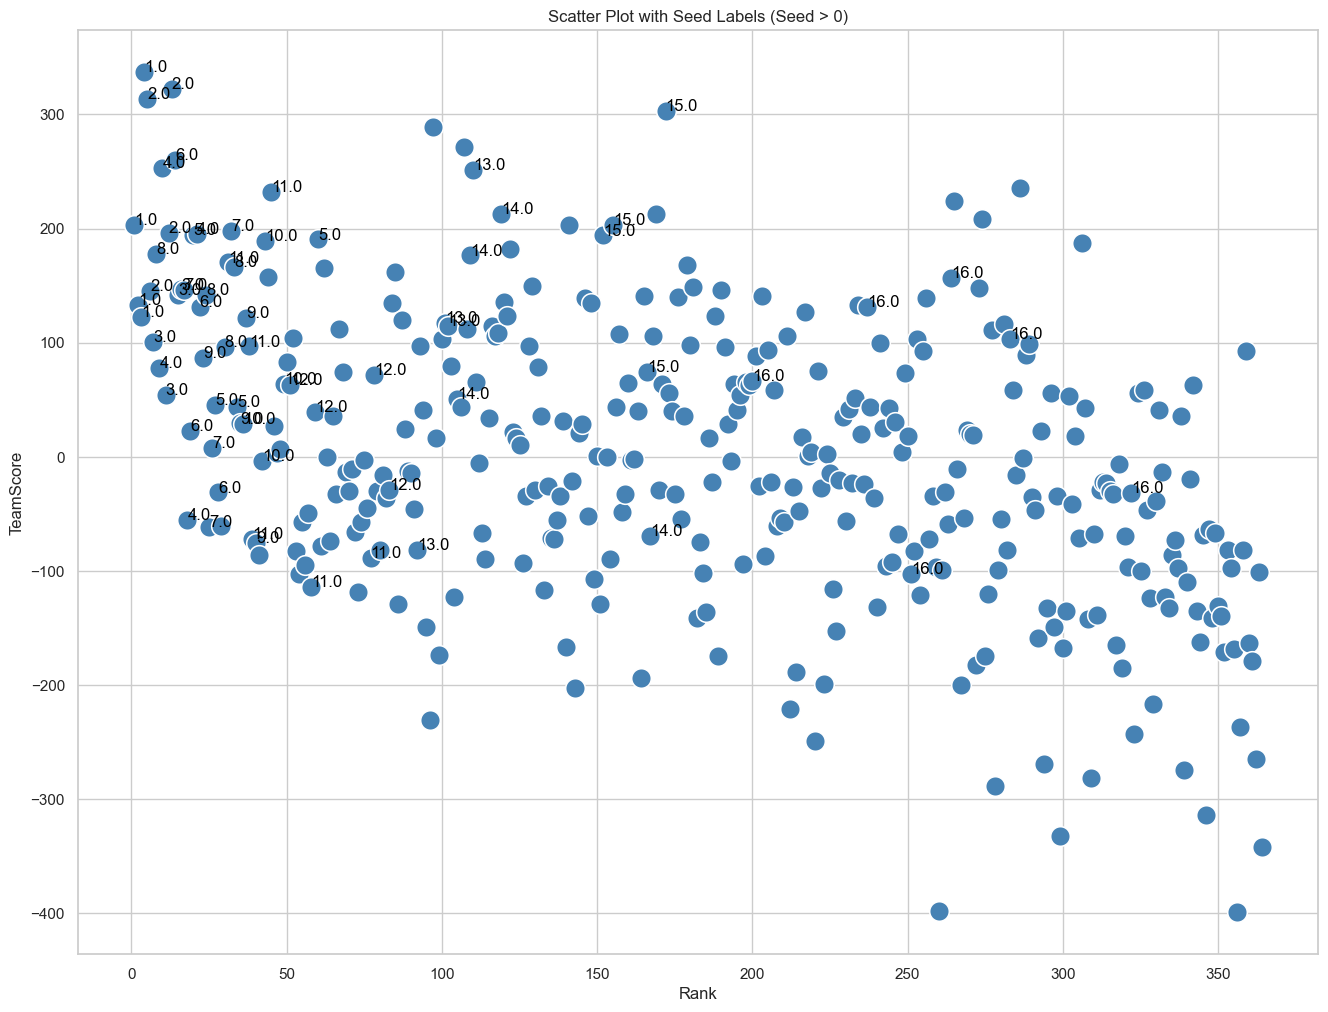

In [329]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Set the Seaborn style for the plot
sns.set(style="whitegrid")

# Create a larger figure to reduce clutter
plt.figure(figsize=(16, 12))

# Create the scatter plot with larger markers
scatter = sns.scatterplot(data=df, x='Rk', y='TeamScore', s=200, color='steelblue')

# Annotate points only if 'Seed' is greater than 0
for idx, row in df.iterrows():
    if row['Seed'] > 0:
        plt.text(row['Rk'] + 0.05, row['TeamScore'], str(row['Seed']),
                 horizontalalignment='left', size='medium', color='black')

# Label the axes and set the title
plt.xlabel('Rank')
plt.ylabel('TeamScore')
plt.title('Scatter Plot with Seed Labels (Seed > 0)')
plt.show()



In [330]:
df.columns

Index(['Rk', 'School', 'Conf', 'AP Rank ', 'Pts', 'Opp', 'MOV', 'OSRS', 'DSRS',
       'ORtg', 'DRtg', 'NRtg', 'Seed', 'W-L%', 'MP', 'FG%', '3P%', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'NCAA', 'GAMES',
       'TeamScore'],
      dtype='object')

/Users/josephguzman/anaconda3/envs/mm_algo/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.8877144298688193
Confusion Matrix:
[[17514  2296]
 [ 2155 17675]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     19810
           1       0.89      0.89      0.89     19830

    accuracy                           0.89     39640
   macro avg       0.89      0.89      0.89     39640
weighted avg       0.89      0.89      0.89     39640



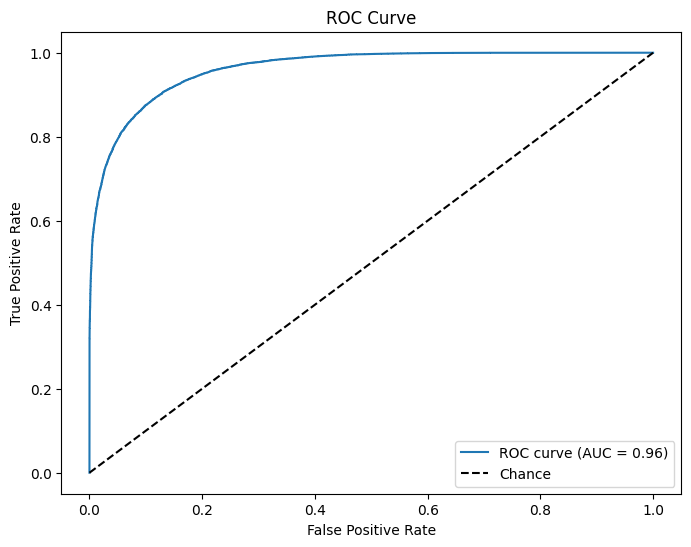

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assume your dataset is loaded into a DataFrame 'df'
# It has the following columns:
# ['TeamA', 'TeamB', 'G_diff', 'W-L%_diff', 'SRS_diff', 'SOS_diff',
#  'Tm._diff', 'Opp._diff', 'MP_diff', 'FG%_diff', '3P%_diff', 'FT%_diff',
#  'ORB_diff', 'TRB_diff', 'AST_diff', 'STL_diff', 'BLK_diff', 'TOV_diff', 'PF_diff', 'TeamScore_diff']

# 1. Define the Outcome:
# If TeamScore_diff > 0, Team A wins (Outcome = 1); otherwise, Team A loses (Outcome = 0)
matchup_df['Outcome'] = (matchup_df['TeamScore_diff'] > 0).astype(int)

# 2. Select features: drop identifier columns (TeamA, TeamB) and TeamScore_diff (used for outcome)
feature_cols = [ 'W-L%_diff', 'SRS_diff', 'SOS_diff', 'Tm._diff', 'Opp._diff',
                'MP_diff', 'FG%_diff', '3P%_diff', 'FT%_diff', 'ORB_diff', 'TRB_diff',
                'AST_diff', 'STL_diff', 'BLK_diff', 'TOV_diff', 'PF_diff']

X = matchup_df[feature_cols]
y = matchup_df['Outcome']


# 3. Split the dataset into training and testing sets.
# Using stratification to maintain the class balance in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Train a logistic regression model.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Predict and evaluate the model on the test set.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Plot the ROC Curve and compute AUC.
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# NNN

Epoch 1/50


/Users/josephguzman/anaconda3/envs/mm_algo/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2643/2643 ━━━━━━━━━━━━━━━━━━━━ 3s 766us/step - accuracy: 0.8635 - loss: 1.0619 - val_accuracy: 0.9134 - val_loss: 0.1962
Epoch 2/50
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 768us/step - accuracy: 0.9083 - loss: 0.2142 - val_accuracy: 0.9210 - val_loss: 0.1766
Epoch 3/50
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - accuracy: 0.9190 - loss: 0.1860 - val_accuracy: 0.9409 - val_loss: 0.1351
Epoch 4/50
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 698us/step - accuracy: 0.9400 - loss: 0.1382 - val_accuracy: 0.9508 - val_loss: 0.1112
Epoch 5/50
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step - accuracy: 0.9499 - loss: 0.1175 - val_accuracy: 0.9517 - val_loss: 0.1086
Epoch 6/50
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step - accuracy: 0.9520 - loss: 0.1131 - val_accuracy: 0.9553 - val_loss: 0.1026
Epoch 7/50
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - accuracy: 0.9539 - loss: 0.1088 - val_accuracy: 0.9536 - val_loss: 0.1073
Epoch 8/50
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step - accuracy: 0.9546 - loss: 0.10

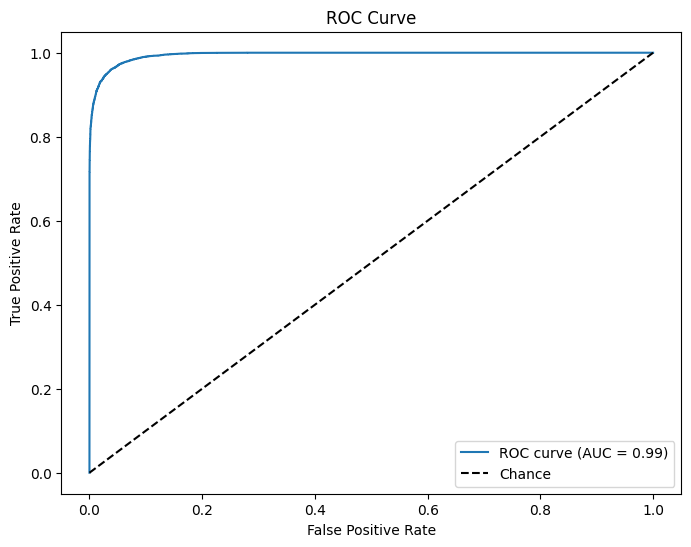

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# -------------------------
# 1. Define the outcome in the dataset
# -------------------------
# If TeamScore_diff > 0, then Team A wins (Outcome = 1); otherwise, Outcome = 0.
matchup_df['Outcome'] = (matchup_df['TeamScore_diff'] > 0).astype(int)

# -------------------------
# 2. Select features: drop identifier columns (TeamA, TeamB) and TeamScore_diff (used for outcome)
# -------------------------
feature_cols = [
    'W-L%_diff', 'SRS_diff', 'SOS_diff', 'MP_diff',  'Opp._diff',
    'FG%_diff', '3P%_diff', 'FT%_diff', 'ORB_diff', 'TRB_diff',
    'AST_diff', 'STL_diff', 'BLK_diff', 'TOV_diff', 'PF_diff'
]

X = matchup_df[feature_cols]
y = matchup_df['Outcome']

# -------------------------
# 3. Split the data into training and test sets
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 4. Build the Neural Network model
# -------------------------
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# -------------------------
# 5. Train the model
# -------------------------
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2, 
    verbose=1
)

# -------------------------
# 6. Evaluate the model on the test set
# -------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# -------------------------
# 7. Generate predictions and compute additional metrics
# -------------------------
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------------------------
# 8. Plot ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [189]:
all.columns

Index(['School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Tm.', 'Opp.', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'NCAA', 'Colley',
       'CompositeOutcome', 'TeamScore'],
      dtype='object')

In [196]:
import numpy as np
import pandas as pd

# Example base features from your season summary DataFrame.
base_features = ['W-L%', 'SRS', 'SOS', 'MP','Opp.', 'FG%', '3P%', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

def predict_matchup(model, teamA_name, teamB_name, df_teams, base_features):
    """
    Compares two teams by computing the difference in their season stats and using the neural network to predict the winner.
    
    Parameters:
      - model: Trained neural network model.
      - teamA_name: Name of Team A (string) as it appears in the 'School' column.
      - teamB_name: Name of Team B (string).
      - df_teams: DataFrame containing season summary statistics for each team.
      - base_features: List of column names in df_teams used for the prediction.
    
    Returns:
      - prob: Predicted probability that Team A wins.
      - predicted_winner: The team predicted to win.
    """
    # Get the stats for each team (assuming team names are unique)
    teamA_stats = df_teams[df_teams['School'] == teamA_name].iloc[0]
    teamB_stats = df_teams[df_teams['School'] == teamB_name].iloc[0]
    
    # Compute the difference vector (Team A's stat minus Team B's stat) for each feature
    diff_vector = np.array([teamA_stats[feat] - teamB_stats[feat] for feat in base_features]).reshape(1, -1)
    
    # Predict the probability that Team A wins (model outputs probability for class 1)
    prob = model.predict(diff_vector)[0][0]
    
    # Based on the probability, choose the predicted winner (threshold of 0.5)
    predicted_winner = teamA_name if prob > 0.5 else teamB_name
    
    return prob, predicted_winner

# Example usage:
# Assume df_teams is your season summary DataFrame with a 'School' column and the base_features columns.
# Also assume your neural network model is trained and stored in the variable `model`.

teamA_name = 'UC San Diego '  # Replace with an actual team name from your dataset.
teamB_name =  'Michigan '  # Replace with another team name.

# Example call to the function:
prob, winner = predict_matchup(model, teamA_name, teamB_name, all[all['NCAA'] == 1], base_features)
print(f"Probability that {teamA_name} wins: {prob:.2f}")
print(f"Predicted winner: {winner}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Probability that UC San Diego  wins: 0.00
Predicted winner: Michigan 


In [217]:
all['School'] = [i.strip() for i in all['School']]
all

,School,G,W,L,W-L%,SRS,SOS,Tm.,Opp.,MP,...,TRB,AST,STL,BLK,TOV,PF,NCAA,Colley,CompositeOutcome,TeamScore
0,Abilene Christian,32,16,16,0.500,-5.47,-2.02,2260,2250,1290,...,1081,421,331,94,476,670,0,0.029412,-2.030294,-154.205326
1,Air Force,32,4,28,0.125,-7.75,3.96,1982,2357,1290,...,956,428,181,91,433,571,0,-0.323529,-1.694765,-405.903739
2,Akron,34,28,6,0.824,3.54,-4.52,2876,2534,1365,...,1325,615,262,127,407,609,1,0.333333,0.324667,580.447999
3,Alabama,33,25,8,0.758,25.96,16.26,3007,2687,1330,...,1422,555,200,147,422,628,1,0.271429,11.175714,763.920334
4,Alabama A&M,32,10,22,0.313,-20.36,-9.77,2337,2521,1300,...,1172,432,266,131,513,687,0,-0.147059,-8.135529,55.552568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Wright State,33,15,18,0.455,-4.91,-3.81,2551,2520,1335,...,1139,502,188,103,401,556,0,-0.014286,-2.242143,208.214531
360,Wyoming,32,12,20,0.375,-0.29,4.58,2149,2277,1285,...,1114,373,141,89,412,617,0,-0.088235,0.784882,-251.070827
361,Xavier,32,21,11,0.656,15.56,8.41,2497,2268,1290,...,1078,542,246,84,359,498,1,0.176471,6.438235,37.883310
362,Yale,29,22,7,0.759,6.78,-3.65,2368,2022,1160,...,1122,474,167,107,289,468,1,0.274194,1.441097,-184.178114


In [226]:
df = pd.read_csv('csv/new_data.csv').fillna(0)
df['W-L%'] = round(df['W'] / (df['W'] + df['L']) , 2)
df['School'] = [i.strip() for i in df['School']]
df = df.merge(all, left_on="School", right_on='School')
df = df.drop(columns = ['W_x', 'L_x',  'SOS_x','SRS_x', 'G', 'W_y', 'L_y', 'W-L%_y', \
                   'SRS_y', 'SOS_y', 'Tm.', 'Opp.','Tm.', 'Opp.'])
df.columns

Index(['Rk', 'School', 'Conf', 'AP Rank ', 'Pts', 'Opp', 'MOV', 'OSRS', 'DSRS',
       'ORtg', 'DRtg', 'NRtg', 'Seed', 'W-L%_x', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'NCAA', 'Colley', 'CompositeOutcome', 'TeamScore'],
      dtype='object')

In [198]:
seed = pd.read_csv('csv/seed.csv')

,Seed,Opponent,Wins,Losses,WinPercentage
0,1,Overall,564,154,78.6
1,1,1,26,26,50.0
2,1,2,43,35,55.1
3,1,3,27,15,64.3
4,1,4,56,25,69.1
...,...,...,...,...,...
267,16,12,0,0,0.0
268,16,13,0,0,0.0
269,16,14,0,0,0.0
270,16,15,0,0,0.0
